In [57]:
import pandas as pd
import numpy as np
from collections import Counter as c
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import pickle
from sklearn.linear_model import LinearRegression

In [58]:
df=pd.read_csv('./sample.csv')
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301


In [59]:
del df['MODEL']
df.columns

Index(['MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION*', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'CO2_EMISSIONS'],
      dtype='object')

In [60]:
df.columns=['Make','MODEL.1','Vehicles_class','Engine_Size','Cylinders','Transmission','Fuel_Type','Fuel_Consumption_City','Fuel_Consumption_Hwy','Fuel_Consumption_Comb(L/100km)','Fuel_Consumption_Comd(mpg)','CO2_Emissions']


In [61]:
df.columns

Index(['Make', 'MODEL.1', 'Vehicles_class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100km)',
       'Fuel_Consumption_Comd(mpg)', 'CO2_Emissions'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Make                            679 non-null    object 
 1   MODEL.1                         679 non-null    object 
 2   Vehicles_class                  679 non-null    object 
 3   Engine_Size                     679 non-null    float64
 4   Cylinders                       679 non-null    int64  
 5   Transmission                    679 non-null    object 
 6   Fuel_Type                       679 non-null    object 
 7   Fuel_Consumption_City           679 non-null    float64
 8   Fuel_Consumption_Hwy            679 non-null    float64
 9   Fuel_Consumption_Comb(L/100km)  679 non-null    float64
 10  Fuel_Consumption_Comd(mpg)      679 non-null    int64  
 11  CO2_Emissions                   679 non-null    int64  
dtypes: float64(4), int64(3), object(5)
m

In [63]:
df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb(L/100km),Fuel_Consumption_Comd(mpg),CO2_Emissions
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,3.252577,5.798233,14.591900,10.613844,12.802798,23.107511,293.656848
std,1.203751,1.531073,3.025654,2.357724,2.685590,5.308083,60.372456
min,1.000000,3.000000,4.900000,4.000000,4.500000,14.000000,104.000000
25%,2.200000,4.000000,12.700000,9.000000,11.000000,19.000000,253.000000
50%,3.000000,6.000000,14.300000,10.100000,12.300000,23.000000,283.000000
75%,4.200000,6.000000,16.650000,12.500000,14.850000,26.000000,340.000000
max,8.000000,12.000000,23.200000,18.000000,20.800000,63.000000,478.000000


In [64]:
np.unique(df.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([3, 4, 5], dtype=int64))

In [65]:
cat=df.dtypes[df.dtypes=='O'].index.values

In [66]:
cat

array(['Make', 'MODEL.1', 'Vehicles_class', 'Transmission', 'Fuel_Type'],
      dtype=object)

In [67]:
for i in cat:
    print("Column : ",i)
    print("Count of classes : ",df[i].nunique())
    print(c(df[i]))
    print("*"*120)

Column :  Make
Count of classes :  34
Counter({'FORD': 63, 'CHEVROLET': 60, 'DODGE': 47, 'BMW': 43, 'GMC': 41, 'TOYOTA': 36, 'VOLKSWAGEN': 35, 'MERCEDES-BENZ': 29, 'CHRYSLER': 25, 'AUDI': 24, 'MAZDA': 24, 'VOLVO': 24, 'NISSAN': 23, 'PONTIAC': 19, 'SAAB': 15, 'SATURN': 15, 'SUZUKI': 15, 'HONDA': 14, 'SUBARU': 13, 'HYUNDAI': 12, 'ACURA': 11, 'DAEWOO': 10, 'JAGUAR': 10, 'KIA': 10, 'PORSCHE': 10, 'JEEP': 9, 'LEXUS': 8, 'LINCOLN': 7, 'OLDSMOBILE': 7, 'BUICK': 6, 'INFINITI': 5, 'CADILLAC': 4, 'ISUZU': 4, 'PLYMOUTH': 1})
************************************************************************************************************************
Column :  MODEL.1
Count of classes :  351
Counter({'RAM 1500': 9, 'DAKOTA': 6, 'DAKOTA 4X4': 6, 'K1500 SIERRA 4X4': 6, 'JETTA': 6, 'C1500 SILVERADO': 5, 'K1500 SILVERADO 4X4': 5, 'F150': 5, 'F150 4X4': 5, 'C1500 SIERRA': 5, 'A4 QUATTRO': 4, 'A6 QUATTRO': 4, 'Z3': 4, 'CAMARO': 4, 'CAVALIER': 4, 'S10 FFV': 4, 'INTREPID': 4, 'SEBRING COUPE': 4, 'LANOS': 4, 'MU

In [68]:
df["Transmission"]=np.where(df["Transmission"].isin(["A4","A5","A3"]),"Automatic",df["Transmission"])
df["Transmission"]=np.where(df["Transmission"].isin(["M5","M6"]),"Manual",df["Transmission"])
df["Transmission"]=np.where(df["Transmission"].isin(["AS4","AS5"]),"Automatic with Select Shift",df["Transmission"])
df["Transmission"]=np.where(df["Transmission"].isin(["AV"]),"Continuously Variable",df["Transmission"])
c(df["Transmission"])

Counter({'Automatic': 425,
         'Manual': 224,
         'Automatic with Select Shift': 29,
         'Continuously Variable': 1})

In [69]:
df["Fuel_Type"]=np.where(df["Fuel_Type"]=="Z","Premium Gasoline",df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]=='X',"Regular Gasoline",df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]=="D","Diesel",df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]=="E","Ethanol(E85)",df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]=="N","Natural Gas",df["Fuel_Type"])
c(df["Fuel_Type"])

Counter({'Regular Gasoline': 442,
         'Premium Gasoline': 223,
         'Ethanol(E85)': 4,
         'Natural Gas': 4,
         'Diesel': 6})

In [70]:
df.dtypes[df.dtypes!='O'].index.values

array(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100km)',
       'Fuel_Consumption_Comd(mpg)', 'CO2_Emissions'], dtype=object)

In [71]:
df.isnull().sum()

Make                              0
MODEL.1                           0
Vehicles_class                    0
Engine_Size                       0
Cylinders                         0
Transmission                      0
Fuel_Type                         0
Fuel_Consumption_City             0
Fuel_Consumption_Hwy              0
Fuel_Consumption_Comb(L/100km)    0
Fuel_Consumption_Comd(mpg)        0
CO2_Emissions                     0
dtype: int64

In [72]:
from sklearn.preprocessing import LabelEncoder
x='*'
for i in cat:
    print("LABEL ENCODING OF : ",i)
    LE=LabelEncoder()
    print(c(df[i]))
    df[i]=LE.fit_transform(df[i])
    print(c(df[i]))
    print(x*100)

LABEL ENCODING OF :  Make
Counter({'FORD': 63, 'CHEVROLET': 60, 'DODGE': 47, 'BMW': 43, 'GMC': 41, 'TOYOTA': 36, 'VOLKSWAGEN': 35, 'MERCEDES-BENZ': 29, 'CHRYSLER': 25, 'AUDI': 24, 'MAZDA': 24, 'VOLVO': 24, 'NISSAN': 23, 'PONTIAC': 19, 'SAAB': 15, 'SATURN': 15, 'SUZUKI': 15, 'HONDA': 14, 'SUBARU': 13, 'HYUNDAI': 12, 'ACURA': 11, 'DAEWOO': 10, 'JAGUAR': 10, 'KIA': 10, 'PORSCHE': 10, 'JEEP': 9, 'LEXUS': 8, 'LINCOLN': 7, 'OLDSMOBILE': 7, 'BUICK': 6, 'INFINITI': 5, 'CADILLAC': 4, 'ISUZU': 4, 'PLYMOUTH': 1})
Counter({9: 63, 5: 60, 8: 47, 2: 43, 10: 41, 31: 36, 32: 35, 21: 29, 6: 25, 1: 24, 20: 24, 33: 24, 22: 23, 25: 19, 27: 15, 28: 15, 30: 15, 11: 14, 29: 13, 12: 12, 0: 11, 7: 10, 15: 10, 17: 10, 26: 10, 16: 9, 18: 8, 19: 7, 23: 7, 3: 6, 13: 5, 4: 4, 14: 4, 24: 1})
****************************************************************************************************
LABEL ENCODING OF :  MODEL.1
Counter({'RAM 1500': 9, 'DAKOTA': 6, 'DAKOTA 4X4': 6, 'K1500 SIERRA 4X4': 6, 'JETTA': 6, 'C1500 SIL

In [73]:
MCO2=df.groupby(['Make'])['CO2_Emissions'].mean().sort_values()[:20].reset_index()

<AxesSubplot:xlabel='Make', ylabel='CO2_Emissions'>

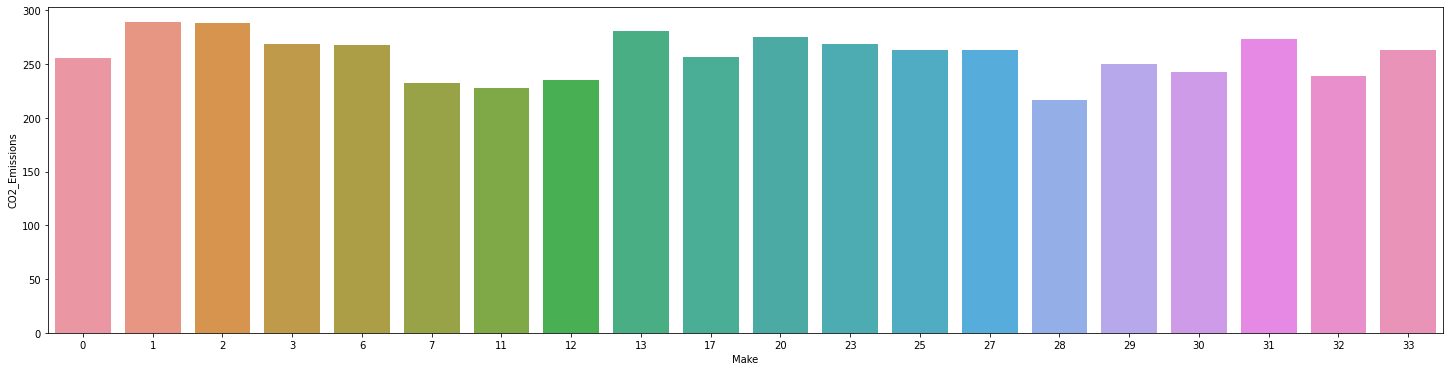

In [74]:
plt.figure(figsize=(25,6))
sns.barplot(x="Make",y="CO2_Emissions",data=MCO2)

In [75]:
VC=df.groupby(['Vehicles_class'])['CO2_Emissions'].mean().sort_values(ascending=False)[:20].reset_index()
plt.figure(figsize=(20,6))

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='Vehicles_class', ylabel='CO2_Emissions'>

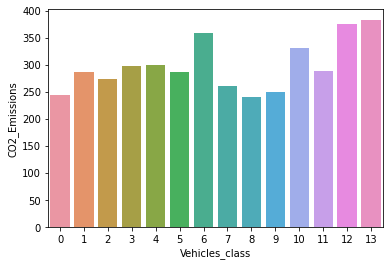

In [76]:
sns.barplot(x='Vehicles_class',y='CO2_Emissions',data=VC)

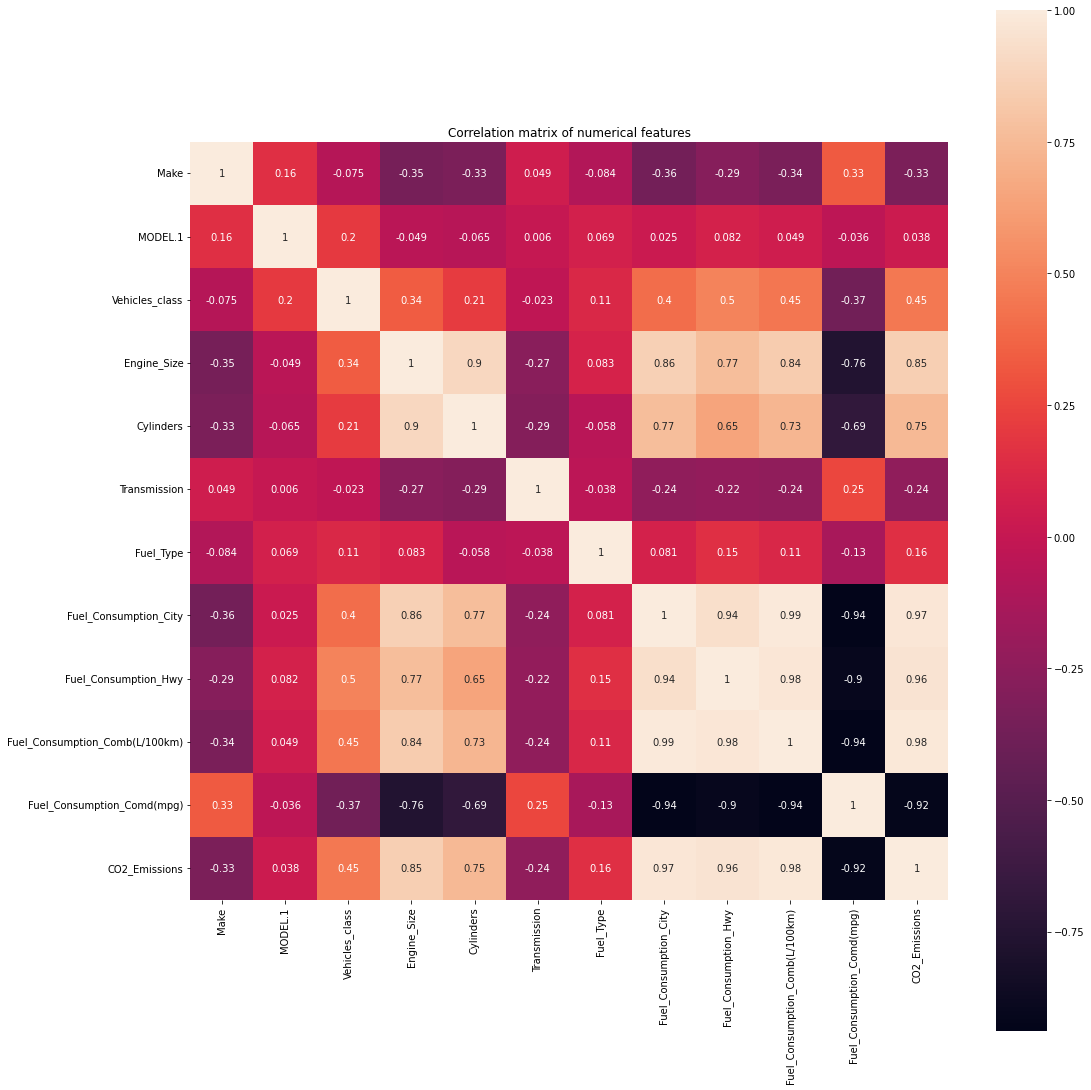

In [77]:
corr=df.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corr,annot=True,square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

<AxesSubplot:>

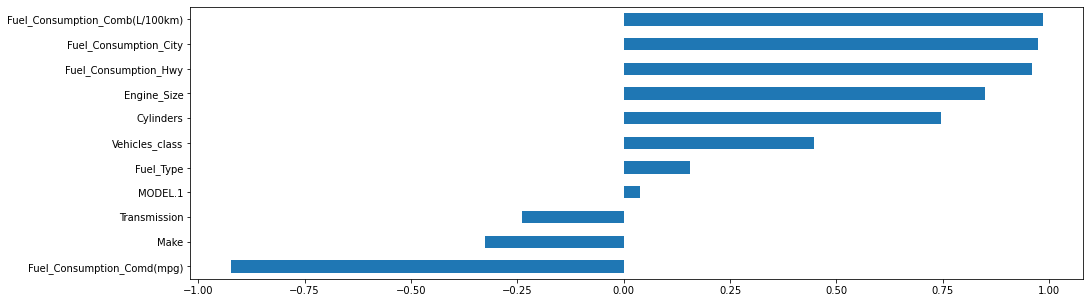

In [78]:
plt.figure(figsize=(16,5))
corr["CO2_Emissions"].sort_values(ascending=True)[:-1].plot(kind="barh")

In [79]:
x=df.drop(['CO2_Emissions','Fuel_Consumption_Comb(L/100km)','MODEL.1'],axis=1)
x=pd.DataFrame(x)
y=df['CO2_Emissions']
y=pd.DataFrame(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(x)
x.tail()

(543, 9)
(136, 9)
     Make  Vehicles_class  Engine_Size  Cylinders  Transmission  Fuel_Type  \
0       0               0          1.7          4             0          4   
1       0               0          1.7          4             3          4   
2       0               0          3.2          6             1          3   
3       0               2          3.2          6             1          3   
4       0               2          3.5          6             0          3   
..    ...             ...          ...        ...           ...        ...   
674    33               7          2.3          5             3          3   
675    33               7          2.4          5             0          3   
676    33               7          2.4          5             3          3   
677    33               7          2.4          5             1          3   
678    33              10          2.4          5             1          3   

     Fuel_Consumption_City  Fuel_Consumption_

,Make,Vehicles_class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comd(mpg)
674,33,7,2.3,5,3,3,13.0,9.3,25
675,33,7,2.4,5,0,3,12.8,9.3,25
676,33,7,2.4,5,3,3,12.5,9.3,26
677,33,7,2.4,5,1,3,14.4,10.3,23
678,33,10,2.4,5,1,3,14.8,11.4,21


In [80]:
print(x_train)

     Make  Vehicles_class  Engine_Size  Cylinders  Transmission  Fuel_Type  \
120     5              13          5.7          8             0          4   
225     8              13          5.2          8             0          4   
198     8              10          5.9          8             0          3   
152     6               1          2.7          6             1          4   
321    10              10          6.0          8             0          4   
..    ...             ...          ...        ...           ...        ...   
534    27               2          2.3          4             0          3   
584    31              10          3.4          6             0          4   
493    23               2          4.0          8             0          3   
527    27               2          2.0          4             3          4   
168     6               0          3.0          6             1          4   

     Fuel_Consumption_City  Fuel_Consumption_Hwy  Fuel_Consumpt

In [81]:
x

,Make,Vehicles_class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comd(mpg)
0,0,0,1.7,4,0,4,9.3,7.2,34
1,0,0,1.7,4,3,4,8.9,7.4,34
2,0,0,3.2,6,1,3,13.7,8.8,25
3,0,2,3.2,6,1,3,13.8,8.8,24
4,0,2,3.5,6,0,3,15.0,10.9,22
...,...,...,...,...,...,...,...,...,...
674,33,7,2.3,5,3,3,13.0,9.3,25
675,33,7,2.4,5,0,3,12.8,9.3,25
676,33,7,2.4,5,3,3,12.5,9.3,26
677,33,7,2.4,5,1,3,14.4,10.3,23


In [82]:
lr=LinearRegression()
lr=lr.fit(x_train,y_train)

In [83]:
x_train

,Make,Vehicles_class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comd(mpg)
120,5,13,5.7,8,0,4,19.9,15.0,16
225,8,13,5.2,8,0,4,21.4,15.8,15
198,8,10,5.9,8,0,3,21.6,15.0,15
152,6,1,2.7,6,1,4,13.3,9.0,25
321,10,10,6.0,8,0,4,22.4,16.3,14
...,...,...,...,...,...,...,...,...,...
534,27,2,2.3,4,0,3,14.0,10.1,23
584,31,10,3.4,6,0,4,16.1,13.4,19
493,23,2,4.0,8,0,3,15.3,10.3,22
527,27,2,2.0,4,3,4,13.0,9.3,25


In [84]:
y_pred=lr.predict(x_test)
y_pred.shape

(136, 1)

In [85]:
y_pred
print(y_test['CO2_Emissions'])

284    361
448    269
199    299
340    191
258    340
      ... 
398    276
375    306
330    283
141    245
130    396
Name: CO2_Emissions, Length: 136, dtype: int64


In [86]:
y_pred.shape

(136, 1)

In [87]:
y_test.shape

(136, 1)

In [88]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(x_train, y_train)

y_pred_rf = randfor.predict(x_test)
print(y_pred_rf)

C:\Users\saivi\AppData\Local\Temp\ipykernel_10564\2720103329.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randfor.fit(x_train, y_train)


[357 271 299 191 338 373 219 294 265 205 267 278 290 435 214 347 338 347
 235 343 255 363 350 373 239 192 265 191 304 311 391 258 265 283 278 235
 271 239 398 329 292 274 196 271 297 271 221 239 275 251 223 239 262 269
 311 306 359 301 301 327 294 391 357 396 274 363 167 294 453 253 253 306
 403 380 407 221 306 276 363 251 275 382 389 343 237 350 389 260 253 191
 336 251 221 363 260 271 166 251 299 324 331 308 246 290 400 317 357 311
 299 271 315 308 366 377 288 292 223 281 271 274 283 299 306 373 363 428
 313 292 386 322 421 274 306 283 275 391]


In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  5.327868570518991
MSE: 260.824313449142
RMSE: 16.150056143838697


In [90]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100


92.62052609242846

In [91]:
r2_score(y_test,y_pred_rf)*100

97.87054386964516

In [92]:
score_lr=r2_score(y_test,y_pred)
score_rf=r2_score(y_test,y_pred_rf)

C:\Users\saivi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

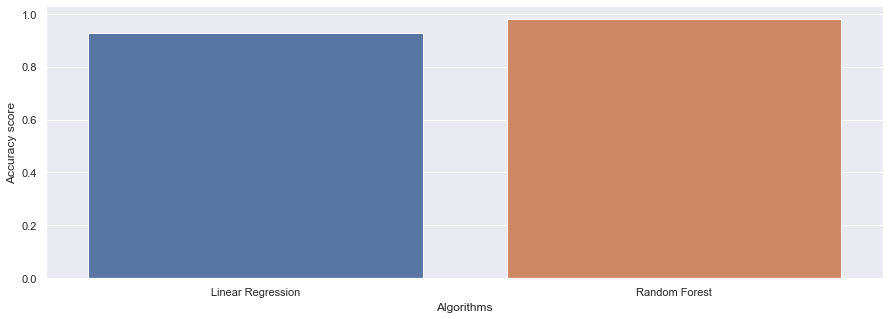

In [93]:
scores = [score_lr,score_rf]
algorithms = ["Linear Regression","Random Forest"] 
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [94]:
pickle.dump(randfor,open('co2.pkl','wb'))